## Spotify 2023 Top 10 Singers

This dataset contains a comprehensive list of the most famous songs of 2023 as listed on Spotify. The dataset offers a wealth of features beyond what is typically available in similar datasets. It provides insights into each song's attributes, popularity, and presence on various music platforms. The dataset includes information such as track name, artist(s) name, release date, Spotify playlists and charts, streaming statistics, Apple Music presence, Deezer presence, Shazam charts, and various audio features.

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [185]:
df = pd.read_csv("spotify-2023.csv",encoding="Latin-1")
df.head()

,track_name,artist_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [186]:
df.columns

Index(['track_name', 'artist_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability', 'valence', 'energy', 'acousticness',
       'instrumentalness', 'liveness', 'speechiness'],
      dtype='object')

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist_name           953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

There are no null values

In [188]:
df["track_name"].nunique()

943

Some of the songs are repeated, therefore, I removed those rows

In [189]:
df[df["track_name"].duplicated(keep=False)].sort_values("track_name")

,track_name,artist_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness
764,About Damn Time,Lizzo,1,2022,4,14,9021,0,723894473,242,...,109,A#,Minor,84,72,74,10,0,34,7
372,About Damn Time,Lizzo,1,2022,7,15,2332,2,723894473,0,...,109,A#,Minor,84,72,74,10,0,34,7
13,Daylight,David Kushner,1,2023,4,14,3528,98,387570742,80,...,130,D,Minor,51,32,43,83,0,9,3
831,Daylight,Harry Styles,1,2022,5,20,2775,0,290833204,21,...,146,NaN,Major,69,63,45,48,0,18,4
47,Die For You,The Weeknd,1,2016,11,24,2483,59,1647990401,68,...,134,C#,Minor,59,51,52,9,0,15,7
417,Die For You,Joji,1,2022,11,4,1703,0,246390068,38,...,148,G#,Major,47,15,52,38,13,29,5
12,Flowers,Miley Cyrus,1,2023,1,12,12211,115,1316855716,300,...,118,NaN,Major,71,65,68,6,0,3,7
825,Flowers,Lauren Spencer Smith,1,2021,8,9,801,0,184826429,42,...,138,D#,Major,70,31,44,84,0,9,39
466,Let It Snow! Let It Snow! Let It Snow!,"Frank Sinatra, B. Swanson Quartet",2,1950,1,1,10585,0,473248298,126,...,143,D,Major,60,86,32,88,0,34,6
448,Let It Snow! Let It Snow! Let It Snow!,Dean Martin,1,1959,11,16,6512,0,446390129,88,...,134,C#,Major,45,72,24,91,0,18,4


Remove the 873, 482, 616 row number

In [190]:
df = df.drop([873,482,616])
df[df["track_name"].duplicated(keep=False)].sort_values("track_name")

,track_name,artist_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness
372,About Damn Time,Lizzo,1,2022,7,15,2332,2,723894473,0,...,109,A#,Minor,84,72,74,10,0,34,7
764,About Damn Time,Lizzo,1,2022,4,14,9021,0,723894473,242,...,109,A#,Minor,84,72,74,10,0,34,7
13,Daylight,David Kushner,1,2023,4,14,3528,98,387570742,80,...,130,D,Minor,51,32,43,83,0,9,3
831,Daylight,Harry Styles,1,2022,5,20,2775,0,290833204,21,...,146,NaN,Major,69,63,45,48,0,18,4
47,Die For You,The Weeknd,1,2016,11,24,2483,59,1647990401,68,...,134,C#,Minor,59,51,52,9,0,15,7
417,Die For You,Joji,1,2022,11,4,1703,0,246390068,38,...,148,G#,Major,47,15,52,38,13,29,5
12,Flowers,Miley Cyrus,1,2023,1,12,12211,115,1316855716,300,...,118,NaN,Major,71,65,68,6,0,3,7
825,Flowers,Lauren Spencer Smith,1,2021,8,9,801,0,184826429,42,...,138,D#,Major,70,31,44,84,0,9,39
448,Let It Snow! Let It Snow! Let It Snow!,Dean Martin,1,1959,11,16,6512,0,446390129,88,...,134,C#,Major,45,72,24,91,0,18,4
466,Let It Snow! Let It Snow! Let It Snow!,"Frank Sinatra, B. Swanson Quartet",2,1950,1,1,10585,0,473248298,126,...,143,D,Major,60,86,32,88,0,34,6


#### Top 10 singers (based on count)

In [191]:
df1 = df["artist_name"].value_counts().head(10)
df1.columns = ["artist_name","count"]
df1

Taylor Swift      34
The Weeknd        21
SZA               19
Bad Bunny         19
Harry Styles      17
Kendrick Lamar    12
Morgan Wallen     11
Ed Sheeran         9
Feid               8
BTS                8
Name: artist_name, dtype: int64

Text(0.5, 0, 'Artists')

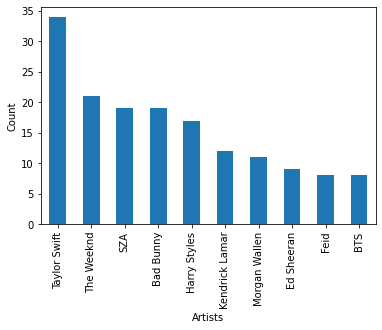

In [192]:
df1.plot(kind="bar")
plt.ylabel("Count")
plt.xlabel("Artists")

In [193]:
df = df.drop(574)

Streams column is of type object, I changed it to integer

In [195]:
df["streams"] = df["streams"].astype(str).astype(np.int64)
df.head()

,track_name,artist_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


#### Distribution of streams

<AxesSubplot:xlabel='streams', ylabel='Count'>

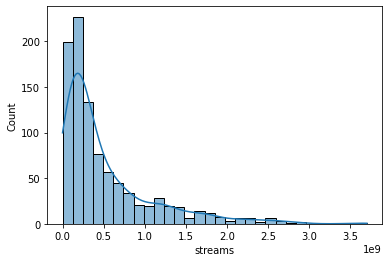

In [196]:
sns.histplot(data=df,x="streams",kde=True,bins=30)

#### Top 10 streamed songs

In [197]:
df1 = df.sort_values(by="streams",ascending=False).head(10)
df1 = df1[["track_name","artist_name","streams"]]
df1

,track_name,artist_name,streams
55,Blinding Lights,The Weeknd,3703895074
179,Shape of You,Ed Sheeran,3562543890
86,Someone You Loved,Lewis Capaldi,2887241814
620,Dance Monkey,Tones and I,2864791672
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2808096550
162,One Dance,"Drake, WizKid, Kyla",2713922350
84,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2665343922
140,Believer,Imagine Dragons,2594040133
725,Closer,"The Chainsmokers, Halsey",2591224264
48,Starboy,"The Weeknd, Daft Punk",2565529693


#### Ranking at Spotify Charts vs the Year 

Text(0.5, 0, 'Ranking at Spotify Charts')

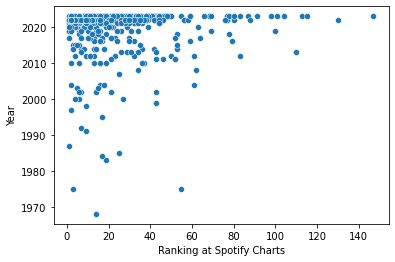

In [200]:
sns.scatterplot(data=df1,x="in_spotify_charts",y="released_year")
plt.ylabel("Year")
plt.xlabel("Ranking at Spotify Charts")

There are few very old songs that have reached the top 20 of the spotify charts

#### Ranking at Spotify Charts vs the Month

Text(0.5, 0, 'Ranking at Spotify Charts')

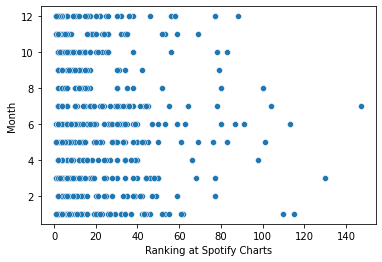

In [201]:
sns.scatterplot(data=df1,x="in_spotify_charts",y="released_month")
plt.ylabel("Month")
plt.xlabel("Ranking at Spotify Charts")

#### Songs that claimed first rank at spotify charts based on the month

In [202]:
df[df["in_spotify_charts"]==1][["track_name","artist_name","released_month"]]

,track_name,artist_name,released_month
228,Hummingbird (Metro Boomin & James Blake),"James Blake, Metro Boomin",6
254,Mejor Que Yo,"Mambo Kingz, DJ Luian, Anuel Aa",5
536,Malvad,"Xam , Gustah, Neo B",11
583,ELEVEN,IVE,12
667,"Cay La Noche (feat. Cruz Cafun , Abhir Hath...","Quevedo, La Pantera, Juseph, Cruz Cafun , B ...",1
672,HUMBLE.,Kendrick Lamar,3
695,Adore You,Harry Styles,12
732,X LTIMA,"Daddy Yankee, Bad Bunny",3
756,Golden,Harry Styles,12
786,Un Verano Sin Ti,Bad Bunny,5


- 5 Songs from Harry Styles
- 8 out of the 16 here were released during the winters (in the USA) - November, December, January

#### Top 10 songs that have been added to spotify playlists 

In [203]:
df1 = df.sort_values(by="in_spotify_playlists",ascending=False).head(10)
df1 = df1[["track_name","artist_name","in_spotify_playlists"]]
df1

,track_name,artist_name,in_spotify_playlists
757,Get Lucky - Radio Edit,"Pharrell Williams, Nile Rodgers, Daft Punk",52898
630,Mr. Brightside,The Killers,51979
720,Wake Me Up - Radio Edit,Avicii,50887
624,Smells Like Teen Spirit - Remastered 2021,Nirvana,49991
199,Take On Me,a-ha,44927
55,Blinding Lights,The Weeknd,43899
162,One Dance,"Drake, WizKid, Kyla",43257
727,Somebody That I Used To Know,"Gotye, Kimbra",42798
114,Everybody Wants To Rule The World,Tears For Fears,41751
871,Sweet Child O' Mine,Guns N' Roses,41231


#### Top 10 songs that have been added to apple playlists 

In [204]:
df1 = df.sort_values(by="in_apple_playlists",ascending=False).head(10)
df1 = df1[["track_name","artist_name","in_apple_playlists"]]
df1

,track_name,artist_name,in_apple_playlists
55,Blinding Lights,The Weeknd,672
403,One Kiss (with Dua Lipa),"Calvin Harris, Dua Lipa",537
620,Dance Monkey,Tones and I,533
407,Don't Start Now,Dua Lipa,532
84,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",492
693,Se o,"Shawn Mendes, Camila Cabello",453
86,Someone You Loved,Lewis Capaldi,440
127,Watermelon Sugar,Harry Styles,437
162,One Dance,"Drake, WizKid, Kyla",433
14,As It Was,Harry Styles,403


Is there any correlation between number of spotify playlist the song is in vs the number of apple playlists? 

In [205]:
df["in_spotify_playlists"].corr(df["in_apple_playlists"])

0.7084477987148275

Yes there is a high positive correlation

Text(0.5, 1.0, 'Apple vs Spotify Playlists for each track')

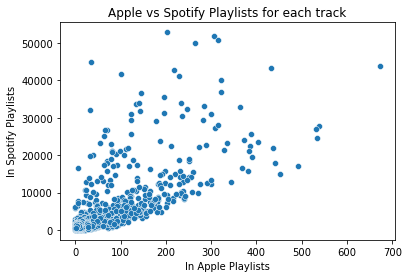

In [206]:
sns.scatterplot(data=df,y="in_spotify_playlists",x="in_apple_playlists")
plt.xlabel("In Apple Playlists")
plt.ylabel("In Spotify Playlists")
plt.title("Apple vs Spotify Playlists for each track")

### Now checking the impact of all the audio features on the streams on spotify 

#### Beats per minutes (bpm)

Text(0.5, 1.0, 'Spotify Streams (in billions) vs Beats per Minutes')

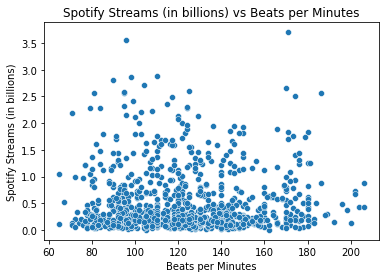

In [207]:
sns.scatterplot(data=df,y=df["streams"]/1000000000,x="bpm")
plt.xlabel("Beats per Minutes")
plt.ylabel("Spotify Streams (in billions)")
plt.title("Spotify Streams (in billions) vs Beats per Minutes")

- Majority of the songs with high spotify streams have 80-120 beats per minutes and around 180 beats per minutes

<AxesSubplot:xlabel='bpm', ylabel='Count'>

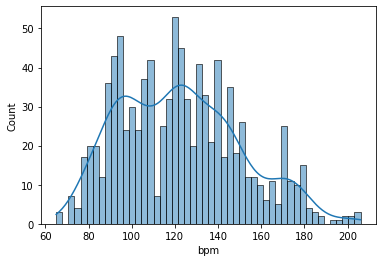

In [208]:
sns.histplot(data=df,x="bpm",bins=50,kde=True)

Majority of the songs have 80-120 bpm and later around 170-180 the number of songs rises

Text(0.5, 1.0, 'Released Year vs Beats per Minutes')

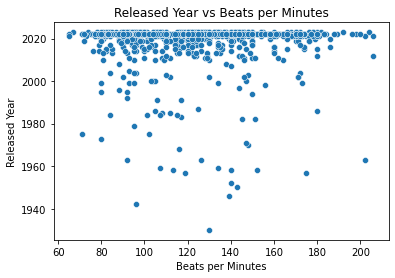

In [209]:
sns.scatterplot(data=df,y=df["released_year"],x="bpm")
plt.xlabel("Beats per Minutes")
plt.ylabel("Released Year")
plt.title("Released Year vs Beats per Minutes")

#### Danceability

<AxesSubplot:xlabel='danceability', ylabel='Count'>

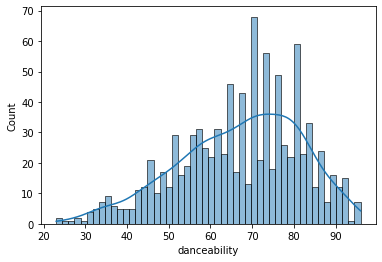

In [210]:
sns.histplot(data=df,x="danceability",bins=50,kde=True)

Text(0.5, 1.0, 'Spotify Streams (in billions) vs Danceability %')

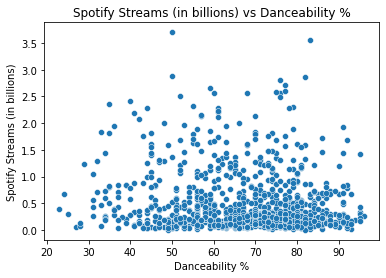

In [211]:
sns.scatterplot(data=df,y=df["streams"]/1000000000,x="danceability")
plt.xlabel("Danceability %")
plt.ylabel("Spotify Streams (in billions)")
plt.title("Spotify Streams (in billions) vs Danceability %")

In [212]:
df["streams"].corr(df["danceability"])

-0.10508394863600153

Danceability % does not really impact the number of streams

#### Valenece (Positivity of the song's musical content)

<AxesSubplot:xlabel='valence', ylabel='Count'>

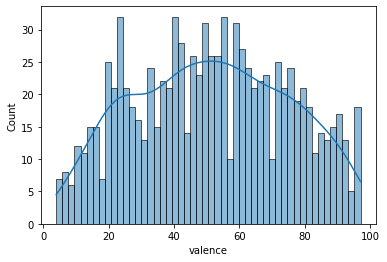

In [213]:
sns.histplot(data=df,x="valence",bins=50,kde=True)

Text(0.5, 1.0, 'Spotify Streams (in billions) vs Valence %')

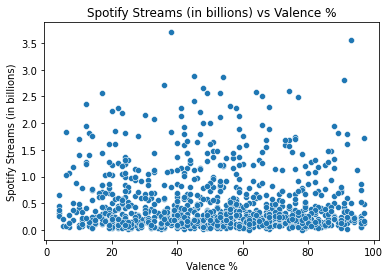

In [214]:
sns.scatterplot(data=df,y=df["streams"]/1000000000,x="valence")
plt.xlabel("Valence %")
plt.ylabel("Spotify Streams (in billions)")
plt.title("Spotify Streams (in billions) vs Valence %")

In [215]:
df["streams"].corr(df["valence"])

-0.040743870875545436

Valence does not impact the streams

Text(0.5, 1.0, 'Spotify Playlists vs Valence %')

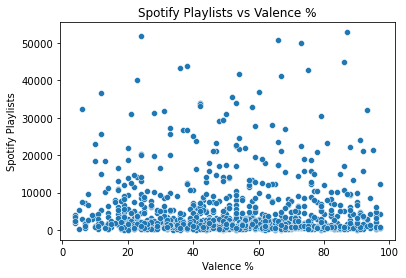

In [216]:
sns.scatterplot(data=df,y=df["in_spotify_playlists"],x="valence")
plt.xlabel("Valence %")
plt.ylabel("Spotify Playlists")
plt.title("Spotify Playlists vs Valence %")

Positivity does not really impact the number of streams and number of playlists the track is in

#### Energy 

<AxesSubplot:xlabel='energy', ylabel='Count'>

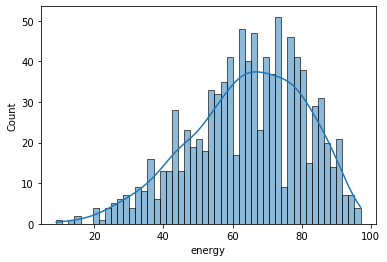

In [217]:
sns.histplot(data=df,x="energy",bins=50,kde=True)

Text(0.5, 1.0, 'Spotify Streams (in billions) vs Energy %')

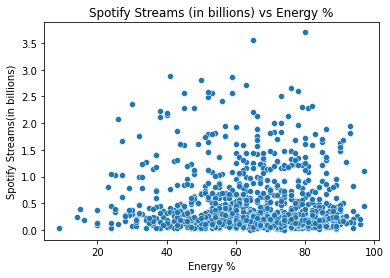

In [218]:
sns.scatterplot(data=df,y=df["streams"]/1000000000,x="energy")
plt.xlabel("Energy %")
plt.ylabel("Spotify Streams(in billions)")
plt.title("Spotify Streams (in billions) vs Energy %")

If you have more than 50% on energy levels then thers is a high chance of bigger number of streams

#### Acousticness

<AxesSubplot:xlabel='acousticness', ylabel='Count'>

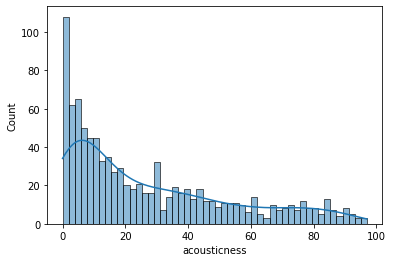

In [219]:
sns.histplot(data=df,x="acousticness",bins=50,kde=True)

Text(0.5, 1.0, 'Spotify Streams (in billions) vs acousticness %')

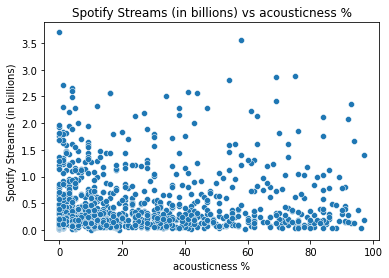

In [220]:
sns.scatterplot(data=df,y=df["streams"]/1000000000,x="acousticness")
plt.xlabel("acousticness %")
plt.ylabel("Spotify Streams (in billions)")
plt.title("Spotify Streams (in billions) vs acousticness %")

Lesser the acousticness % higher the chance of spotify streams

#### Instrumentalness

<AxesSubplot:xlabel='instrumentalness', ylabel='Count'>

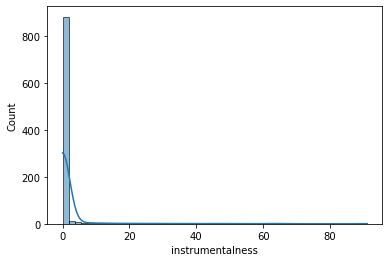

In [221]:
sns.histplot(data=df,x="instrumentalness",bins=50,kde=True)

Text(0.5, 1.0, 'Spotify Streams (in billions) vs instrumentalness %')

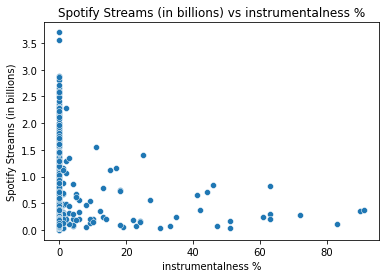

In [222]:
sns.scatterplot(data=df,y=df["streams"]/1000000000,x="instrumentalness")
plt.xlabel("instrumentalness %")
plt.ylabel("Spotify Streams (in billions)")
plt.title("Spotify Streams (in billions) vs instrumentalness %")

#### Liveness

<AxesSubplot:xlabel='liveness', ylabel='Count'>

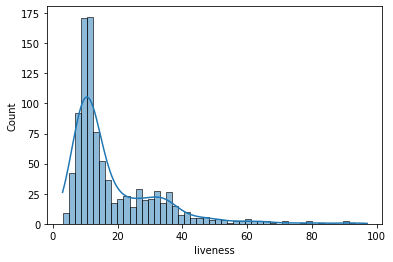

In [223]:
sns.histplot(data=df,x="liveness",bins=50,kde=True)

Text(0.5, 1.0, 'Spotify Streams (in billions) vs liveness %')

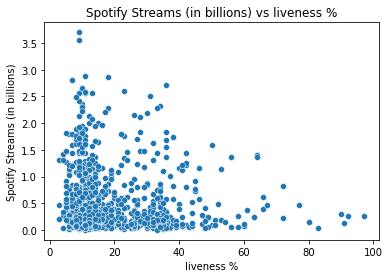

In [224]:
sns.scatterplot(data=df,y=df["streams"]/1000000000,x="liveness")
plt.xlabel("liveness %")
plt.ylabel("Spotify Streams (in billions)")
plt.title("Spotify Streams (in billions) vs liveness %")

Lower the liveness % higher the spotify streams

#### Speechiness

<AxesSubplot:xlabel='speechiness', ylabel='Count'>

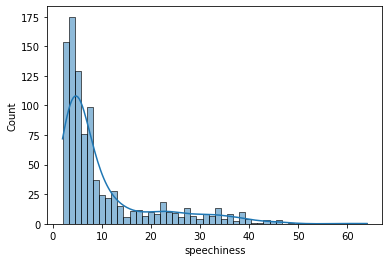

In [225]:
sns.histplot(data=df,x="speechiness",bins=50,kde=True)

Text(0.5, 1.0, 'Spotify Streams (in billions) vs speechiness %')

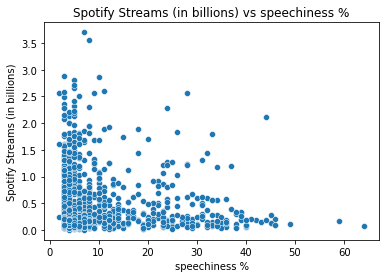

In [226]:
sns.scatterplot(data=df,y=df["streams"]/1000000000,x="speechiness")
plt.xlabel("speechiness %")
plt.ylabel("Spotify Streams (in billions)")
plt.title("Spotify Streams (in billions) vs speechiness %")

Lower the speechness % higher the spotify streams

In [227]:
df.columns

Index(['track_name', 'artist_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability', 'valence', 'energy', 'acousticness',
       'instrumentalness', 'liveness', 'speechiness'],
      dtype='object')

Now final data frame will contain "track_name", "artist_name", "in_spotify_playlists", "in_spotify_charts", "streams", "in_apple_playlists","bpm","danceability","energy"

In [228]:
df_final = df[["track_name", "artist_name", "in_spotify_playlists", "in_spotify_charts", "streams",
             "in_apple_playlists","bpm","danceability","energy"]]
df_final.head()

,track_name,artist_name,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,bpm,danceability,energy
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",553,147,141381703,43,125,80,83
1,LALA,Myke Towers,1474,48,133716286,48,92,71,74
2,vampire,Olivia Rodrigo,1397,113,140003974,94,138,51,53
3,Cruel Summer,Taylor Swift,7858,100,800840817,116,170,55,72
4,WHERE SHE GOES,Bad Bunny,3133,50,303236322,84,144,65,80


In [229]:
df.shape

(949, 24)

Some songs have artist count greater than 1. I seperated the artists to include the features as well 

In [231]:
df[df["artist_count"]!=1]

,track_name,artist_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,...,141,C#,Major,92,66,58,19,0,8,24
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,...,148,F,Minor,67,83,76,48,0,8,3
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,...,170,D,Minor,81,56,48,21,0,8,33
10,un x100to,"Bad Bunny, Grupo Frontera",2,2023,4,17,2876,40,505671438,41,...,83,F#,Minor,57,56,72,23,0,27,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,Con La Brisa,"Ludwig Goransson, Foudeqush",2,2022,11,4,486,0,71095708,8,...,114,D,Minor,62,25,44,51,33,14,3
943,Privileged Rappers,"Drake, 21 Savage",2,2022,11,4,1007,0,112436403,6,...,144,F,Major,93,62,61,0,0,12,20
946,Broke Boys,"Drake, 21 Savage",2,2022,11,4,1060,0,106249219,3,...,120,D,Major,64,11,53,1,0,25,27
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6


In [232]:
for i in range(len(df)):
    if(df.loc[i,"artist_count"] != 1):
        row = df.loc[i]
        names = row.artist_name.split(", ")
        for name in names:
            row.artist_name = name
            row.artist_count = 1
            df = pd.concat([df,row.to_frame().T])
    else:
        pass

C:\Users\User\anaconda3\lib\site-packages\pandas\core\series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assignment_possible()


KeyError: 482

In [233]:
df.shape

(1401, 24)

In [234]:
df1 = df["artist_name"].value_counts().head(10)
df1.columns = ["artist_name","count"]
df1

Taylor Swift      37
The Weeknd        35
Bad Bunny         29
SZA               25
Feid              20
Harry Styles      17
Peso Pluma        17
Kendrick Lamar    16
Morgan Wallen     14
Metro Boomin      14
Name: artist_name, dtype: int64

#### Top 10 singers

In [239]:
singers = ["Taylor Swift","The Weeknd","Bad Bunny","SZA","Feid",
           "Harry Styles","Peso Pluma","Kendrick Lamar","Morgan Wallen","Metro Boomin"]

In [244]:
df_final = df[["track_name", "artist_name", "in_spotify_playlists", "in_spotify_charts", "streams",
             "in_apple_playlists","bpm","danceability","energy"]]
filters = df_final["artist_name"].isin(singers)
df_final = df_final[filters]
df_final.head()

,track_name,artist_name,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,bpm,danceability,energy
3,Cruel Summer,Taylor Swift,7858,100,800840817,116,170,55,72
4,WHERE SHE GOES,Bad Bunny,3133,50,303236322,84,144,65,80
9,La Bebe - Remix,Peso Pluma,2953,44,553634067,49,170,81,48
10,un x100to,Bad Bunny,2876,40,505671438,41,83,57,72
14,As It Was,Harry Styles,23575,130,2513188493,403,174,52,73


In [237]:
df_final.to_csv('spotify-2023-final.csv') 